<a href="https://colab.research.google.com/github/manishbhnau/Repo/blob/master/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Importing the files


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee'],
      dtype='object')
<bound method DataFrame.count of      Unnamed: 0   Income  Limit  ...         Ethnicity  Balance  Defaultee
0             1   14.891   3606  ...         Caucasian      333          0
1             2  106.025   6645  ...             Asian      903          0
2             3  104.593   7075  ...             Asian      580          0
3             4  148.924   9504  ...             Asian      964          0
4             5   55.882   4897  ...         Caucasian      331          0
..          ...      ...    ...  ...               ...      ...        ...
395         396   12.096   4100  ...         Caucasian      560          0
396         397   13.364   3838  ...  African American      480          0
397         398   57.872   4171  ...         Caucasian      138          0
398         399   37.728   2525  ...   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

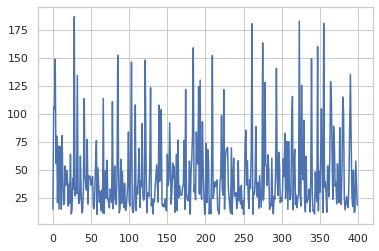

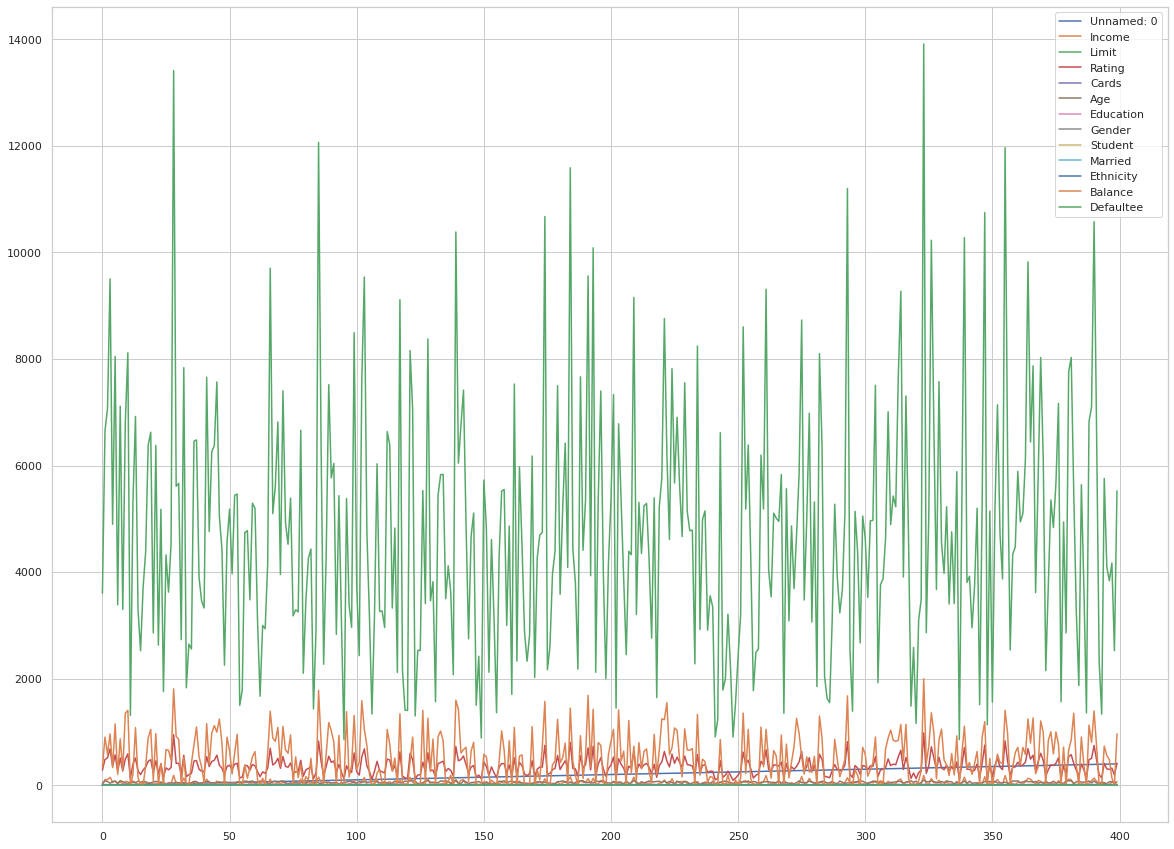

In [ ]:
data=pd.read_csv("Credit.csv", header=0)
data=data.dropna()

print(data.columns)
print(data.count)

data['Gender'] = data['Gender'].replace(['Male'],1)
data['Gender'] = data['Gender'].replace(['Female'],0)

data['Student'] = data['Student'].replace(['Yes'],1)
data['Student'] = data['Student'].replace(['No'],0)

data['Married'] = data['Married'].replace(['Yes'],1)
data['Married'] = data['Married'].replace(['No'],0)


data['Ethnicity']= data['Ethnicity'].replace(['Caucasian'],0)
data['Ethnicity']= data['Ethnicity'].replace(['Asian'],1)
data['Ethnicity']= data['Ethnicity'].replace(['African American'],2)

print (data.head())
data.to_csv("credit_edit.csv", index=False)
files.download("credit_edit.csv")
data['Income'].plot()
data.plot(figsize=(20, 15))

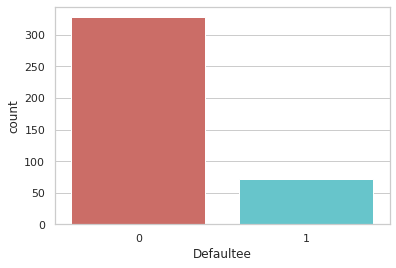

array([0, 1, 2])

In [ ]:
data["Gender"].unique()
data['Defaultee'].value_counts()
sns.countplot(x='Defaultee', data=data, palette='hls') #hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65, as_cmap=False)
plt.show()
data["Ethnicity"].unique()


In [ ]:
data.groupby('Defaultee').mean()
data.groupby('Age').mean()
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,14.891,3606,283,2,34,11,1,0,1,0,333,0
1,106.025,6645,483,3,82,15,0,1,1,1,903,0
2,104.593,7075,514,4,71,11,1,0,0,1,580,0
3,148.924,9504,681,3,36,11,0,0,0,1,964,0
4,55.882,4897,357,2,68,16,1,0,1,0,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,560,0
396,13.364,3838,296,5,65,17,1,0,0,2,480,0
397,57.872,4171,321,5,67,12,0,0,1,0,138,0
398,37.728,2525,192,1,44,13,1,0,1,0,0,0


# Outliers

In [ ]:
outliers =[]
def detect_outliers(data):
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  print(mean, std)

  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

dd= data[['Income']].apply(detect_outliers)
print (dd)
i= data[(( data.Income == 152.298) | (data.Income == 158.889) | (data.Income == 151.947))].index
data=data.drop(i)



44.39400503778339 34.02375469020312
    Income
0  148.924
1  186.634
2  148.080
3  180.379
4  163.329
5  182.728
6  149.316
7  160.231
8  180.682


In [ ]:
X = data.loc[:, data.columns != 'Defaultee']
y = data.loc[:, data.columns == 'Defaultee']
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices

#Step 2: Defining X and y
#y, X = dmatrices('Defaultee ~ Income  + C(Rating) + C(Balance)', data, return_type = "dataframe")

#Step 3: Fitting the model
#logit_model = sm.Logit(y.iloc[:,1], X)
logit_model = sm.Logit(y/y.sum(), X)
result = logit_model.fit()

#Step 4: Analyzing model results
result.summary()


Optimization terminated successfully.
         Current function value: 0.002924
         Iterations 12


/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Defaultee   No. Observations:                  397
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                           11
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                     inf
Time:                        07:22:06   Log-Likelihood:                -1.1608
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Unnamed: 0    -0.0002      0.009     -0.021      0.984      -0.018       0.017
Income         0.0917      0.083      1.098      0.272      -0.072       0.255
Limit         -0.0011      0.007     -0.154      0.878      -0.015       0.013
Rating        -0.0301      0.095     -0.319      0.750      -0.215       0.155
Cards         -0.2186      0.896     -0.244      0.807      -1.974       1.537
Age           -0.0029      0.059     -0.050      0.960      -0.118       0.113
Education     -0.0888      0.277     -0.321      0.748      -0.631       0.453
Gender        -0.5195      2.135     -0.243      0.808      -4.703       3.664
Student       -5.0195      6.114     -0.821      0.412     -17.003       6.964
Married       -0.1026      2.285     -0.045      0.964      -4.582       4.377
Ethnicity     -0.2150      1.273     -0.169      0.866      -2.710       2.280
Balance        0.0143      0.013      1.115      0.265      -0.011       0.039
==============================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
#sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source]
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[97  5]
 [ 5 13]]


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       102
           1       0.72      0.72      0.72        18

    accuracy                           0.92       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.92      0.92      0.92       120



In [ ]:
logreg.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

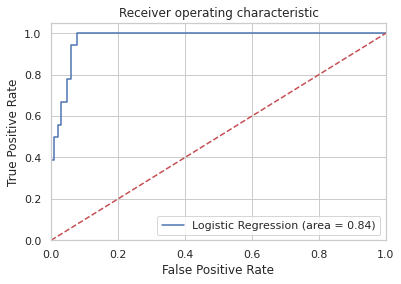

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()





Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[False False False False  True False False  True  True  True  True False]
[7 2 8 5 1 4 3 1 1 1 1 6]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
